### RAÍCES:

In [38]:
import sympy as sp
x = sp.symbols('x')
eq = x**5 - 6*x**4 + 2*x**3 + 20*x**2 - 27*x + 10
raices = sp.solve(sp.Eq(eq, 0), x)

print(raices)

[-2, 1, 5]


### ODE:

Valor de h: 0.1


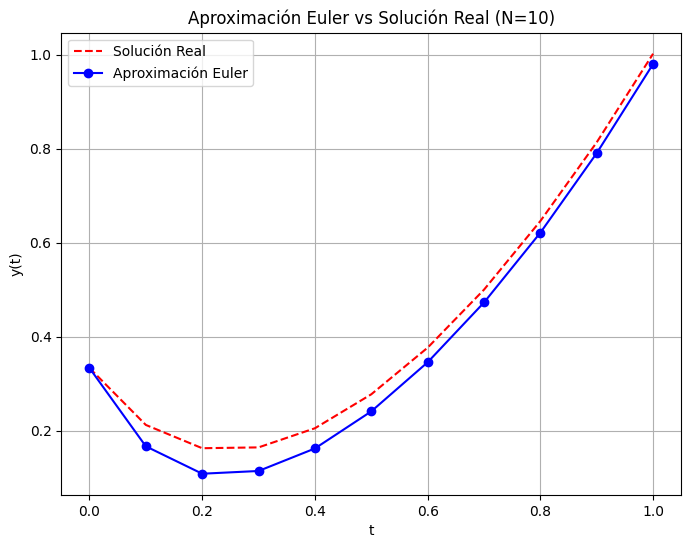

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from src.ODE import ODE_euler

def f(t, y):
    return -5 * y + 5 * t**2 + 2 * t

def y_exact(t):
    return t**2 + (1/3) * np.exp(-5 * t)

def graficar(N, a=0, b=1, y_t0=1/3):
    ys_euler, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    ys_exact = [y_exact(t) for t in ts]
    
    print("Valor de h:", h)
    
    plt.figure(figsize=(8, 6))
    plt.plot(ts, ys_exact, label="Solución Real", linestyle="--", color="red")
    plt.plot(ts, ys_euler, label="Aproximación Euler", marker="o", linestyle="-", color="blue")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title(f"Aproximación Euler vs Solución Real (N={N})")
    plt.legend()
    plt.grid(True)
    plt.show()

graficar(N=10)

Valor de h: 0.2


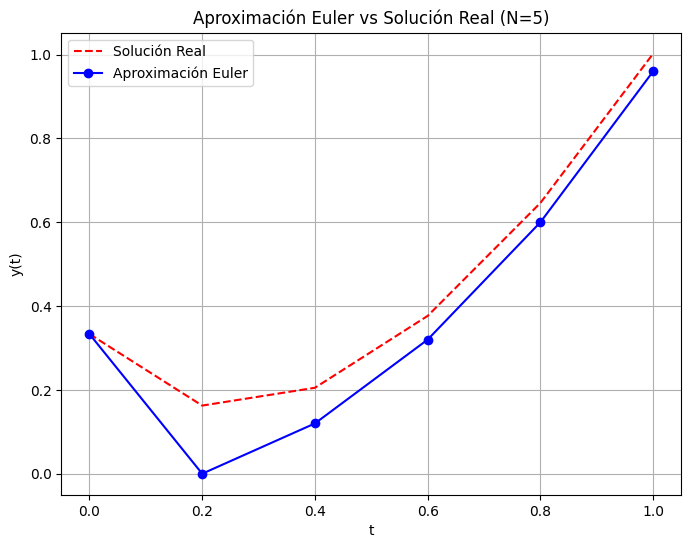

Valor de h: 0.1


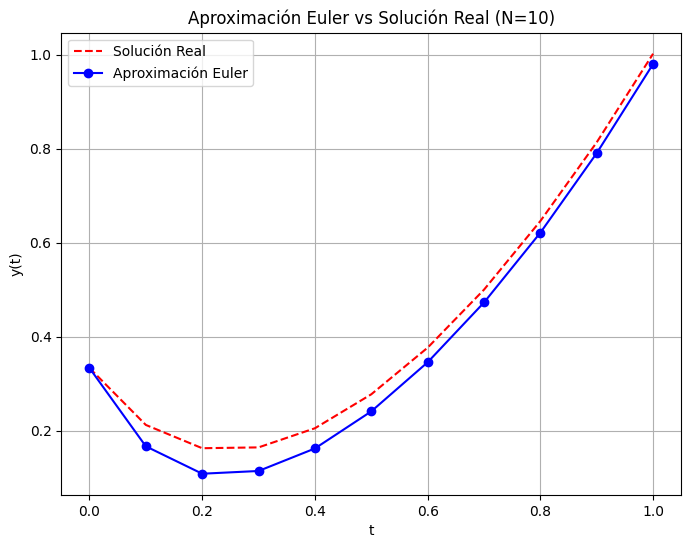

Valor de h: 0.05


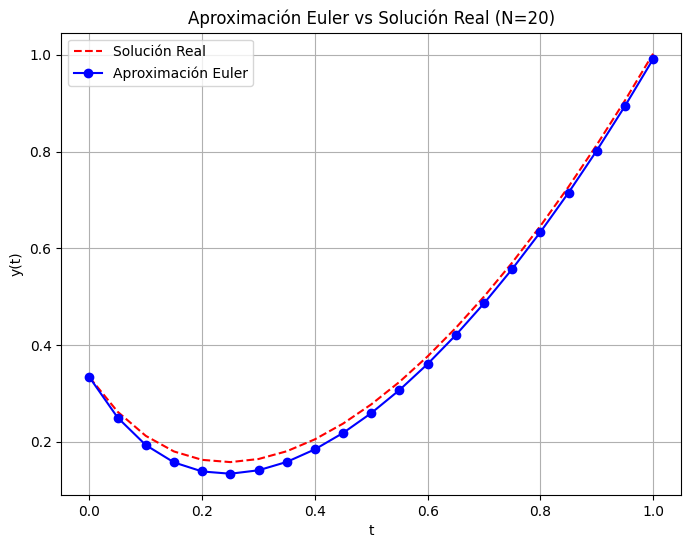

In [45]:
graficar(N=5)
graficar(N=10)
graficar(N=20)

In [46]:
def error_relativo_promedio(N, a=0, b=1, y_t0=1/3):
    ys_euler, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    
    errores = []
    for y_approx, t in zip(ys_euler, ts):
        y_ex = y_exact(t)
        if np.isclose(y_ex, 0):
            error = abs(y_approx - y_ex)
        else:
            error = abs(y_approx - y_ex) / abs(y_ex)
        errores.append(error)
    
    return np.mean(errores)

Ns = [10, 5, 20]
error_promedios = []
    
for N in Ns:
    err_prom = error_relativo_promedio(N)
    error_promedios.append(err_prom)
    print(f"N = {N}, Error Relativo Promedio = {err_prom}")

N = 10, Error Relativo Promedio = 0.1290954106813849
N = 5, Error Relativo Promedio = 0.2797909081673575
N = 20, Error Relativo Promedio = 0.0631456968405627
